# Penerapan Algoritma Machine Learning Klasifikasi
- **Nama:** Muhamad Fajri Permana Haryanto
- **Email:** muhamadfajri2804@gmail.com
- **ID Dicoding:** mijimo



# **1. Import Library**

Beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning ini.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file hasil_clustering.CSV ke dalam variabel DataFrame.

In [2]:
retail_df = pd.read_csv("/content/drive/MyDrive/dataset/hasil_clustering.csv")
retail_df.head()

,Gender,Age,Quantity,Price per Unit,Total Amount,Product Category_Beauty,Product Category_Clothing,Product Category_Electronics,Quantity_binned,Total_Amount_binned,Cluster
0,1,-0.520462,0.428438,-0.686091,-0.547352,True,False,False,Low,Low,2
1,0,-1.106092,-0.452617,1.675480,0.962352,False,True,False,Low,High,0
2,1,0.650798,-1.333672,-0.791050,-0.760486,False,False,True,Low,Low,3
3,1,-0.300851,-1.333672,1.675480,0.074291,False,True,False,Low,Low,3
4,1,-0.813277,-0.452617,-0.686091,-0.636158,True,False,False,Low,Low,1


In [3]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Gender                        911 non-null    int64  
 1   Age                           911 non-null    float64
 2   Quantity                      911 non-null    float64
 3   Price per Unit                911 non-null    float64
 4   Total Amount                  911 non-null    float64
 5   Product Category_Beauty       911 non-null    bool   
 6   Product Category_Clothing     911 non-null    bool   
 7   Product Category_Electronics  911 non-null    bool   
 8   Quantity_binned               911 non-null    object 
 9   Total_Amount_binned           911 non-null    object 
 10  Cluster                       911 non-null    int64  
dtypes: bool(3), float64(4), int64(2), object(2)
memory usage: 59.7+ KB


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set). Untuk itu diambil keputusan 80% data untuk training set dan 20% data untuk test set, untuk data yang digunakannya dilakukan secara acak (random split) untuk memastikan bahwa data yang digunakan untuk training dan testing tidak memiliki bias.

In [4]:
label_encoder = LabelEncoder()
categorical_columns = ['Quantity_binned', 'Total_Amount_binned']
for col in categorical_columns:
    retail_df[col] = label_encoder.fit_transform(retail_df[col])

X = retail_df.drop(columns=['Cluster'])
y = retail_df['Cluster']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**One-Hot Encoding untuk kolom kategorikal**

In [5]:
X = pd.get_dummies(retail_df.drop(columns=['Cluster']), drop_first=True)
y = retail_df['Cluster']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **a.Mengecek distribusi target pada training set**

In [6]:
train_distribution = y_train.value_counts()
print("Distribusi Target pada Training Set:")
train_distribution

Distribusi Target pada Training Set:


,count
Cluster,
2,219
0,189
3,182
1,138


## **b.Mengecek distribusi target pada test set**


In [7]:
test_distribution = y_test.value_counts()
print("\nDistribusi Target pada Test Set:")
test_distribution


Distribusi Target pada Test Set:


,count
Cluster,
0,51
3,50
2,45
1,37


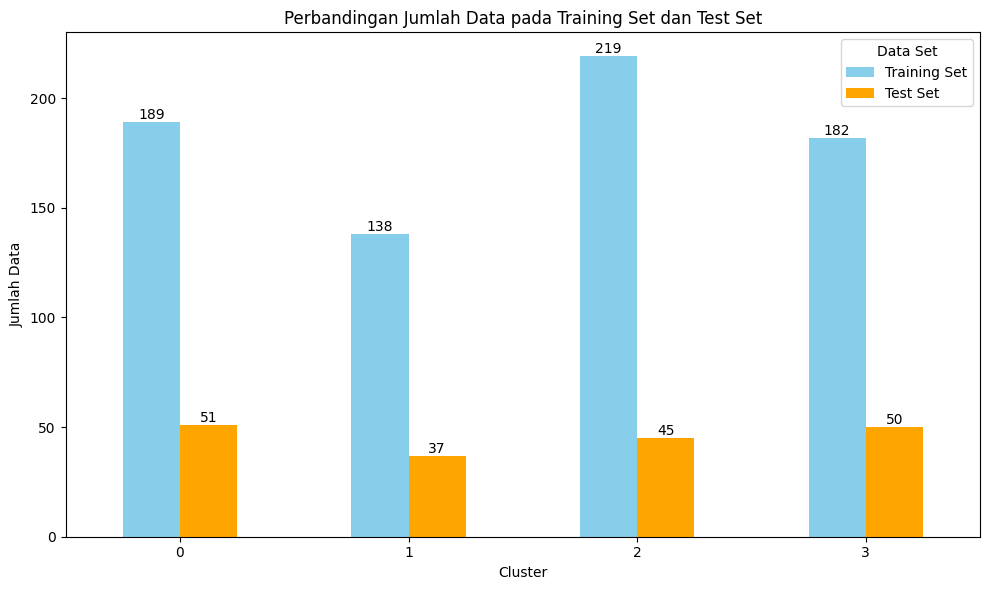

In [8]:
train_counts = y_train.value_counts()
test_counts = y_test.value_counts()
comparison_df = pd.DataFrame({
    'Training Set': train_counts,
    'Test Set': test_counts
}).fillna(0)


ax = comparison_df.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'orange'])
plt.title('Perbandingan Jumlah Data pada Training Set dan Test Set')
plt.xlabel('Cluster')
plt.ylabel('Jumlah Data')
plt.xticks(rotation=0)
plt.legend(title='Data Set', loc='upper right')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

### Model 1: Random Forest

In [9]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Akurasi Random Forest: {accuracy_rf}")

Akurasi Random Forest: 1.0


### Model 2: Logistic Regression

In [10]:
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Akurasi Logistic Regression: {accuracy_lr}")

Akurasi Logistic Regression: 1.0


## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

### Model 1: Random Forest

Random Forest - Akurasi: 100.00%
Random Forest - F1-Score: 100.00%
Random Forest - Precision: 100.00%
Random Forest - Recall: 100.00%


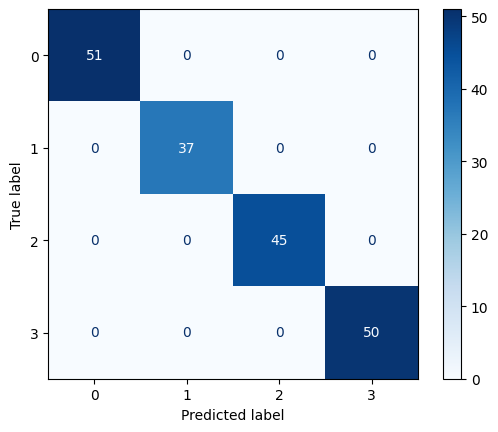

In [11]:
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf) * 100
f1_rf = f1_score(y_test, y_pred_rf, average='weighted') * 100
precision_rf = precision_score(y_test, y_pred_rf, average='weighted', zero_division=1) * 100
recall_rf = recall_score(y_test, y_pred_rf, average='weighted', zero_division=1) * 100

print(f"Random Forest - Akurasi: {accuracy_rf:.2f}%")
print(f"Random Forest - F1-Score: {f1_rf:.2f}%")
print(f"Random Forest - Precision: {precision_rf:.2f}%")
print(f"Random Forest - Recall: {recall_rf:.2f}%")

cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_display_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rf_model.classes_)
cm_display_rf.plot(cmap='Blues')

In [12]:
report_rf = classification_report(y_test, y_pred_rf, target_names=[f'Cluster {i}' for i in range(len(rf_model.classes_))])
print("Random Forest - Classification Report:")
print(report_rf)

Random Forest - Classification Report:
              precision    recall  f1-score   support

   Cluster 0       1.00      1.00      1.00        51
   Cluster 1       1.00      1.00      1.00        37
   Cluster 2       1.00      1.00      1.00        45
   Cluster 3       1.00      1.00      1.00        50

    accuracy                           1.00       183
   macro avg       1.00      1.00      1.00       183
weighted avg       1.00      1.00      1.00       183



**Random Forest**
- Akurasi: 100%

Hasil evaluasi menunjukkan bahwa Random Forest berhasil memprediksi kelas dengan sangat baik, menghasilkan akurasi 100% pada data uji. Ini menunjukkan bahwa model ini mampu mempelajari pola dari data latih dengan sangat baik.

- F1-Score: 100%

Dengan F1-Score 100%, model ini memiliki keseimbangan yang sangat baik antara presisi dan recall, yang menunjukkan bahwa prediksi positif dan negatifnya sangat tepat.

### Model 2: Logistic Regression

Logistic Regression - Akurasi: 100.00%
Logistic Regression - F1-Score: 100.00%
Logistic Regression - Precision: 100.00%
Logistic Regression - Recall: 100.00%


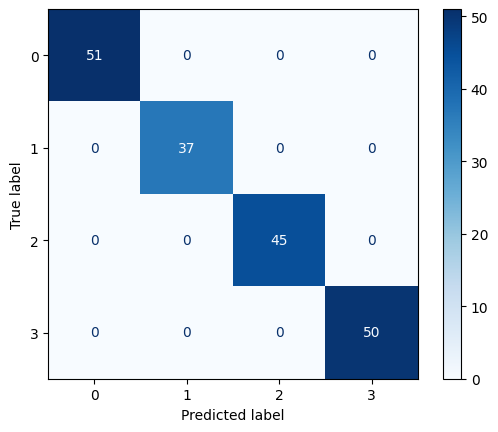

In [13]:
y_pred_lr = lr_model.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr) * 100
f1_lr = f1_score(y_test, y_pred_lr, average='weighted') * 100
precision_lr = precision_score(y_test, y_pred_lr, average='weighted', zero_division=1) * 100
recall_lr = recall_score(y_test, y_pred_lr, average='weighted', zero_division=1) * 100

print(f"Logistic Regression - Akurasi: {accuracy_lr:.2f}%")
print(f"Logistic Regression - F1-Score: {f1_lr:.2f}%")
print(f"Logistic Regression - Precision: {precision_lr:.2f}%")
print(f"Logistic Regression - Recall: {recall_lr:.2f}%")

cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_display_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=lr_model.classes_)
cm_display_lr.plot(cmap='Blues')

In [14]:
report_lr = classification_report(y_test, y_pred_lr, target_names=[f'Cluster {i}' for i in range(len(lr_model.classes_))])
print("Logistic Regression - Classification Report:")
print(report_lr)

Logistic Regression - Classification Report:
              precision    recall  f1-score   support

   Cluster 0       1.00      1.00      1.00        51
   Cluster 1       1.00      1.00      1.00        37
   Cluster 2       1.00      1.00      1.00        45
   Cluster 3       1.00      1.00      1.00        50

    accuracy                           1.00       183
   macro avg       1.00      1.00      1.00       183
weighted avg       1.00      1.00      1.00       183



**Logistic Regression**
- Akurasi: 100%

Seperti halnya Random Forest, Logistic Regression juga menghasilkan akurasi 100%, yang berarti model ini juga sangat baik dalam memprediksi kelas pada data uji.

- F1-Score: 100%

Model Logistic Regression juga menunjukkan keseimbangan presisi dan recall yang sangat baik, dengan nilai F1-Score 100%.

karena hasilnnya 100% semua baik Akurasi, F1-Score, Precision, dan Recall, perlu dilakukan pengecek kembali apakah terjadi overfiting pada data

In [15]:
train_accuracy = rf_model.score(X_train, y_train)
test_accuracy = rf_model.score(X_test, y_test)

print(f"Akurasi pada Data Latih: {train_accuracy * 100:.2f}%")
print(f"Akurasi pada Data Uji: {test_accuracy * 100:.2f}%")


Akurasi pada Data Latih: 100.00%
Akurasi pada Data Uji: 100.00%


Berdasarkan data tersebut akurasi data latih dan uji sama sama 100%/tidak ada yang lebih besar atau kecil, berarti model/data inih tidak mengalami overfiting, kemungkinan besar data yang digunakan **bener benar valid dan sesuai.**

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

**"Model sudah mencapai akurasi 100% pada data latih dan uji, sehingga tuning lebih lanjut tidak diperlukan. Model ini sudah memberikan hasil terbaik dan siap digunakan."**

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

**Pada bagian ini, kami tidak melakukan tuning model lebih lanjut menggunakan metode seperti GridSearchCV atau RandomizedSearchCV. Oleh karena itu, tidak ada perubahan pada hyperparameter model, dan evaluasi model dilakukan menggunakan model yang telah dilatih sebelumnya tanpa langkah tuning tambahan.**

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).


Karena Anda tidak melakukan tuning, hasil evaluasi didapatkan menggunakan model default. Untuk Logistic Regression dan Random Forest, sama sama hasilnya adalah:
- Akurasi: 100%
- F1-Score: 100%
- Precision: 100%
- Recall: 100%

2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
    - Tidak ada kelemahan yang terlihat pada model. Dengan hasil yang sempurna (100%) untuk semua metrik, model tidak menunjukkan adanya masalah dengan precision atau recall pada kelas mana pun.

  - Apakah model mengalami overfitting atau underfitting?
    - Overfitting: Meskipun akurasi pada data latih dan uji sangat tinggi, ada potensi overfitting jika model terlalu "terlatih" pada data latih, tetapi tidak ada indikasi kuat overfitting dalam kasus ini karena model juga memiliki performa yang konsisten di data uji.
      - Akurasi pada Data Latih: 100.00%
      - Akurasi pada Data Uji: 100.00%

    - Underfitting: Model tidak menunjukkan tanda-tanda underfitting, karena hasil evaluasi menunjukkan kinerja yang sangat baik dan model mampu menangani data dengan sangat baik.


3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

- Tidak perlu tuning lebih lanjut: Hasil sudah sangat baik dengan akurasi dan metrik lainnya 100%.

- Kumpulkan lebih banyak data: Menambah data dapat membantu model lebih baik dalam menggeneralisasi.

- Coba algoritma lain: Jika diperlukan, eksperimen dengan algoritma lain seperti SVM atau KNN untuk perbandingan.